In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import torch, torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms

torch.manual_seed(0)
np.random.seed(0)

In [2]:
mini_batch_size = 128
n_epochs = 1

In [3]:
df = pd.read_csv('doodle-detectives-aiclubiitm/train.csv')#, dtype={'drawing': np.array})

In [4]:
from PIL import Image, ImageDraw
import numpy as np
import json

def vector_to_numpy(drawing, side=256):
    image = vector_to_image(drawing, side)
    image_array = np.array(image)
    return image_array

def vector_to_image(drawing, side=256):
    drawing = json.loads(drawing)
    min_x, min_y, max_x, max_y = calculate_bounding_box(drawing)

    # Calculate the offset to center the drawing within the canvas
    offset_x = (side - (max_x - min_x + 1)) // 2
    offset_y = (side - (max_y - min_y + 1)) // 2

    image = Image.new('L', (side, side), color='white')  # Create a white canvas
    draw = ImageDraw.Draw(image)

    for x, y in drawing:
        xy = [(x0 - min_x + offset_x, y0 - min_y + offset_y) for x0, y0 in zip(x, y)]
        draw.line(xy, fill='black', width=1)

    return image

def calculate_bounding_box(drawing):
    all_x = [x for x, _ in drawing]
    all_y = [y for _, y in drawing]

    min_x = min(min(x) for x in all_x)
    min_y = min(min(y) for y in all_y)
    max_x = max(max(x) for x in all_x)
    max_y = max(max(y) for y in all_y)

    return min_x, min_y, max_x, max_y

In [5]:
df['drawing'] = df['drawing'].map(vector_to_numpy)
# df.to_csv('doodle-detectives-aiclubiitm/train_images.csv', index=False)


TypeError: NDFrame.to_hdf() missing 1 required positional argument: 'key'

In [11]:
# df.to_hdf('doodle-detectives-aiclubiitm/train_hdf5.csv', key='table', index=False)

ValueError: The file 'doodle-detectives-aiclubiitm/train_hdf5.csv' is already opened, but in read-only mode.  Please close it before reopening in append mode.

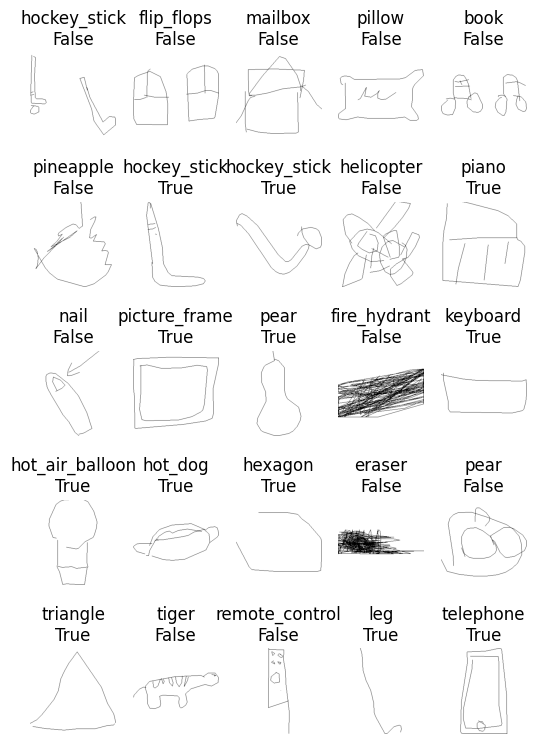

In [12]:
img_indices = np.array([np.random.randint(0, len(df)) for i in range(25)]) # An array of random integers
fig, axes = plt.subplots(5, 5)
# A plot with 5 subplots
for n, i in enumerate(img_indices):
    axes[n//5, n%5].set_title(f"{df.loc[i]['word']}\n{df.loc[i]['recognized']}")
    # // is integer division. This gets us the data in rows and columns of the graph
    # print(type(df.loc[i]['drawing']))
    img = df.loc[i]['drawing']
    axes[n//5, n%5].axis('off') # No need for z and y axes
    axes[n//5, n%5].imshow(img, cmap='gray') # Syntax for plotting images in numpy
plt.subplots_adjust(bottom=0, top=1.5)

In [24]:
# df_h = pd.read_hdf('doodle-detectives-aiclubiitm/train_hdf5.csv', 'table')
import ast
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))
df_c = pd.read_csv('doodle-detectives-aiclubiitm/train_images.csv', converters={'drawing': from_np_array})
# df_c['drawing'] = df_c['drawing'].map(lambda string: ast.literal_eval(string.replace('\n', ' ')))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (7,) + inhomogeneous part.

In [ ]:
df_images = 

In [ ]:
classes = df['word'].unique()

line          4166
triangle      4164
rainbow       4160
pear          4151
piano         4147
              ... 
telephone     2073
flip_flops    2072
golf_club     2072
t-shirt       2072
mushroom      2068
Name: word, Length: 101, dtype: int64


<BarContainer object of 101 artists>

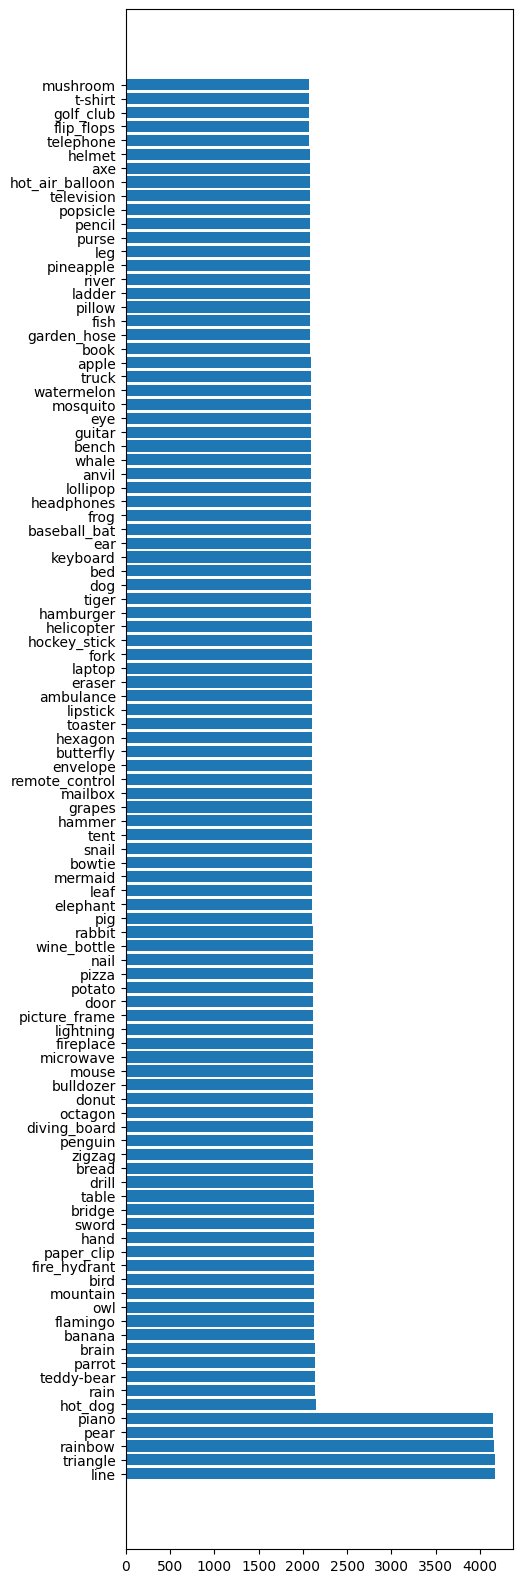

In [ ]:
plt.figure(figsize=(5, 20))
graph = dict.fromkeys(classes)
# for word in graph:
    # graph[word] = (len(df['word'][df['recognized'] == True]),len(df['word'][df['recognized'] == False]))
graph = df[df['recognized'] == True]['word'].value_counts()
print(graph)
plt.barh(graph.index, graph)

In [ ]:
# pd.read_pickle('doodle-detectives-aiclubiitm/train_pickle.csv')